<a href="https://colab.research.google.com/github/BMugo84/pytorch_in_25_hours/blob/main/using_facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.1 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#extract face using mtcnn
from mtcnn.mtcnn import MTCNN
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## test case


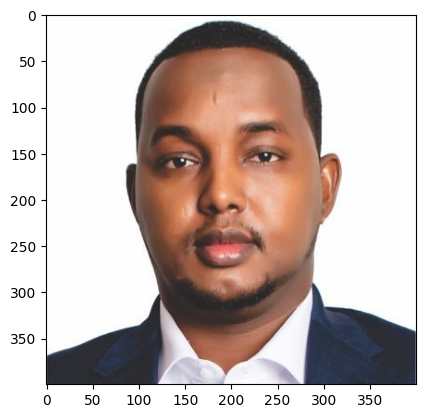

In [ ]:
img = cv.imread("/content/outputimage_0.png")

# remember opencv reads BGR and plt reads RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
#extract face using mtcnn
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 [==============================] - 0s 165ms/step


In [ ]:
results

[{'box': [103, 49, 194, 260],
  'confidence': 0.999930739402771,
  'keypoints': {'left_eye': (144, 158),
   'right_eye': (234, 153),
   'nose': (186, 202),
   'mouth_left': (160, 253),
   'mouth_right': (232, 249)}}]

In [ ]:
x,y,w,h = results[0]['box']

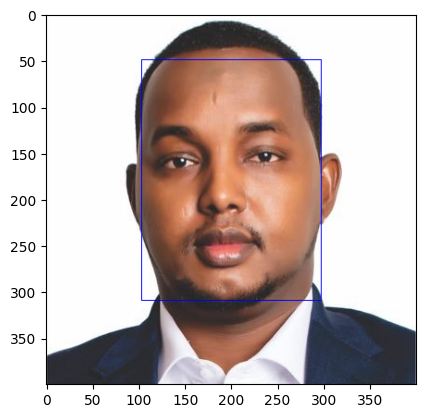

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255))
plt.imshow(img)

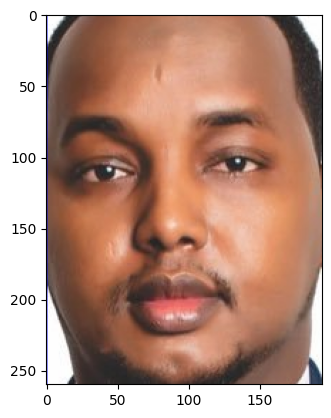

In [ ]:
# only show face
my_face = img[y:y+h, x:x+w]
plt.imshow(my_face)

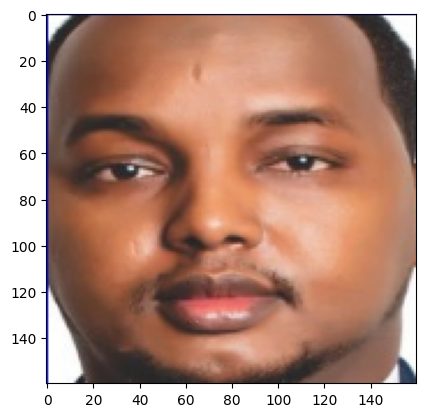

In [ ]:
# resice to facenet standards
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

## automation

In [ ]:
# now to automate it all

# unzip images
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/
   creating: dataset/ababu_namwamba/
  inflating: dataset/ababu_namwamba/outputimage_0.png  
  inflating: dataset/ababu_namwamba/outputimage_1.png  
  inflating: dataset/ababu_namwamba/outputimage_10.png  
  inflating: dataset/ababu_namwamba/outputimage_2.png  
  inflating: dataset/ababu_namwamba/outputimage_3.png  
 extracting: dataset/ababu_namwamba/outputimage_4.png  
  inflating: dataset/ababu_namwamba/outputimage_5.png  
  inflating: dataset/ababu_namwamba/outputimage_8.png  
  inflating: dataset/ababu_namwamba/outputimage_9.png  
   creating: dataset/aden_duale/
  inflating: dataset/aden_duale/outputimage_0.png  
  inflating: dataset/aden_duale/outputimage_1.png  
 extracting: dataset/aden_duale/outputimage_10.png  
  inflating: dataset/aden_duale/outputimage_2.png  
  inflating: dataset/aden_duale/outputimage_3.png  
 extracting: dataset/aden_duale/outputimage_4.png  
  inflating: dataset/aden_duale/outputimage_5.png  
  inflating: dat

In [ ]:
# create a class

class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')


In [ ]:
faceloading = FACELOADING("/content/dataset")
X, Y = faceloading.load_classes()

1/1 [==============================] - 0s 23ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 196ms/step
Loaded successfully: 5
1/1 [==============================] - 0s 18ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 25ms/step
Loaded successfully: 1
1/1 [==============================] - 0s 18ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 16ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 17ms/step
Loaded successfully: 9
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 16ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 11
1/1 [==============================] - 0s 29ms/step
Loaded successfully: 6
1/1 [==============================] - 0s 18ms/step
Loaded successfully: 7
1/1 [=============

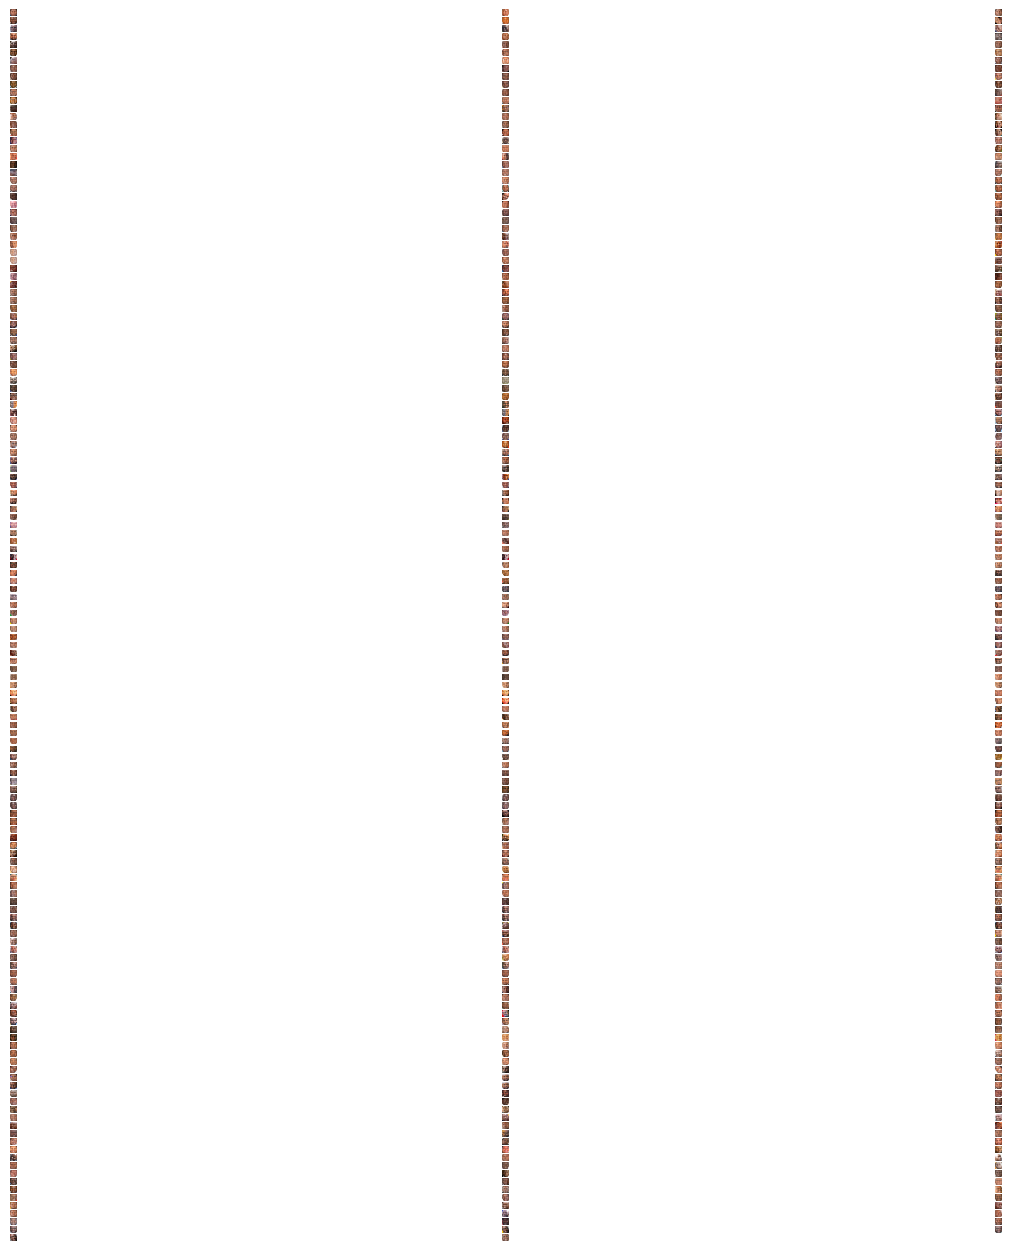

In [ ]:
faceloading.plot_images()

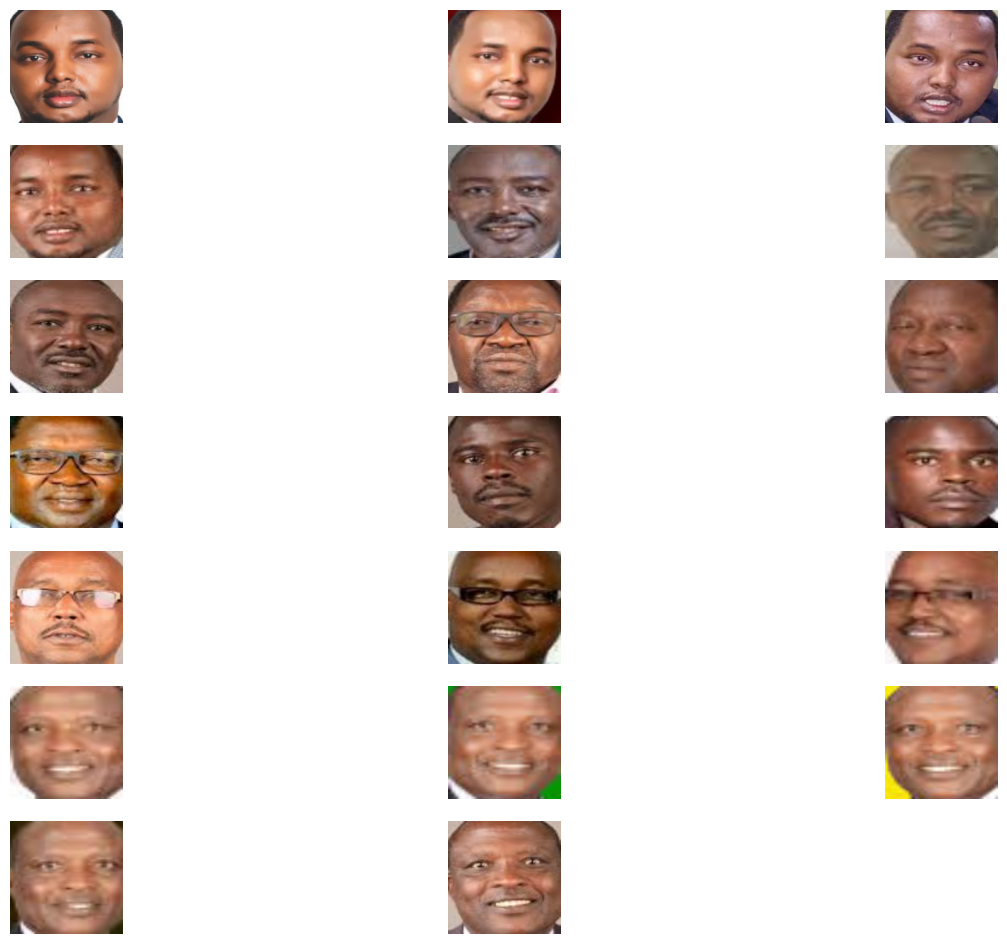

In [ ]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

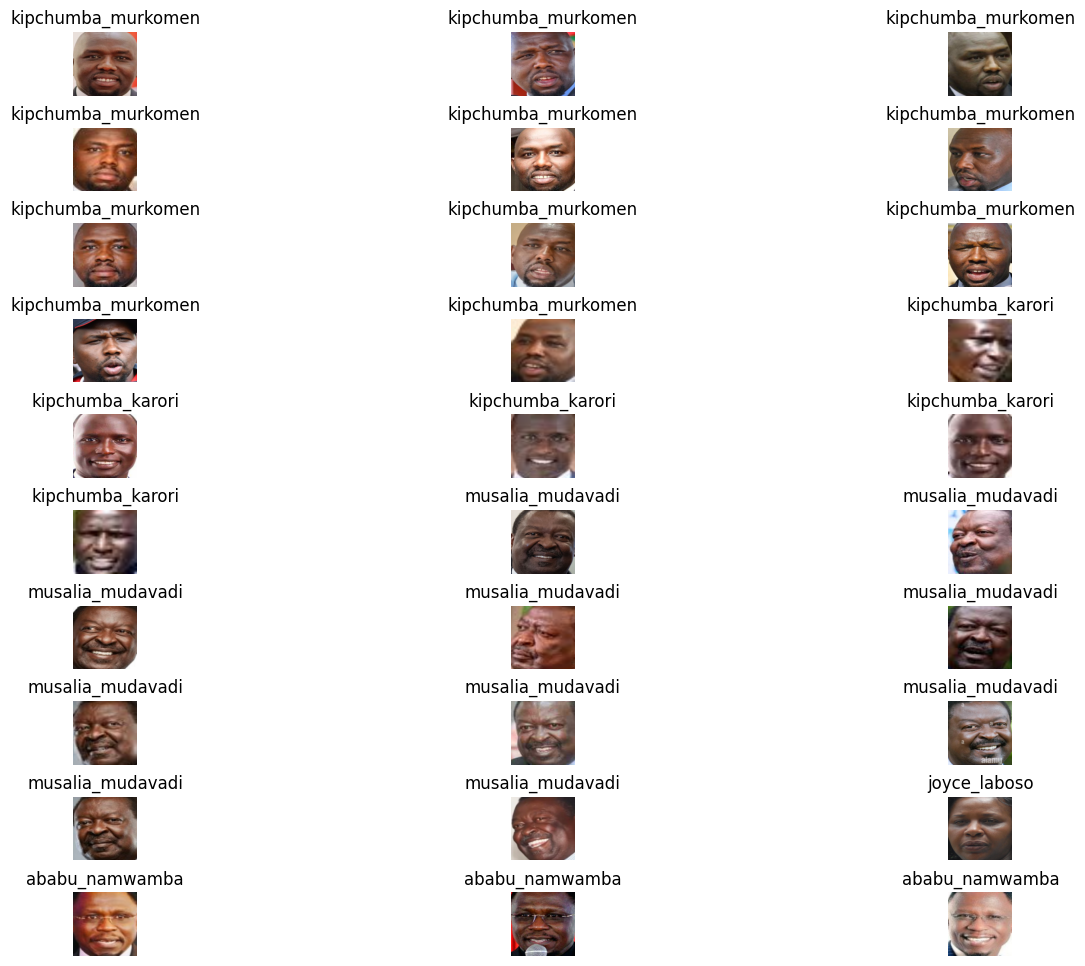

In [ ]:
import matplotlib.pyplot as plt

def plot_images(X, Y, ncols=3, limit=30):
    num_images = min(len(X), limit)
    nrows = (num_images + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))
    fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

    for i, ax in enumerate(axes.flat):
        ax.axis('off')
        if i < num_images:
            ax.imshow(X[i])
            ax.set_title(Y[i])
        else:
            ax.axis('off')  # Turn off axis for empty subplots

# Example usage:
# Assuming X is a list of images and Y is a list of corresponding labels
plot_images(X, Y)
plt.show()






# facenet part

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=6778806135c7226d6d80eebde51f033757365ca814c6977a9cdd058f6ec9f497
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet

embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (nonex160x160x3)
    yhat = embedder.embeddings(face_img)
    return yhat[0] # 512D(1x1x512)



In [ ]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))
EMBEDDED_X = np.asarray(EMBEDDED_X)


1/1 [==============================] - 0s 26ms/step


In [ ]:
np.savez_compressed('face_embeddings_done_for_classes.npz', EMBEDDED_X, Y)

# for now, saving the embedings, datasets in drive

## mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/face_embeddings_done_for_classes.npz" "/content/drive/MyDrive/WEEK 7/"

# smv model

In [ ]:
import numpy as np

# Load the data from the .npz file
data = np.load("/content/drive/MyDrive/WEEK 7/face_embeddings_done_for_classes.npz")

# Access the arrays using their keys
EMBEDDED_X = data['arr_0']
Y = data['arr_1']


In [ ]:
Y

array(['kipchumba_murkomen', 'kipchumba_murkomen', 'kipchumba_murkomen',
       'kipchumba_murkomen', 'kipchumba_murkomen', 'kipchumba_murkomen',
       'kipchumba_murkomen', 'kipchumba_murkomen', 'kipchumba_murkomen',
       'kipchumba_murkomen', 'kipchumba_murkomen', 'kipchumba_karori',
       'kipchumba_karori', 'kipchumba_karori', 'kipchumba_karori',
       'kipchumba_karori', 'musalia_mudavadi', 'musalia_mudavadi',
       'musalia_mudavadi', 'musalia_mudavadi', 'musalia_mudavadi',
       'musalia_mudavadi', 'musalia_mudavadi', 'musalia_mudavadi',
       'musalia_mudavadi', 'musalia_mudavadi', 'joyce_laboso',
       'ababu_namwamba', 'ababu_namwamba', 'ababu_namwamba',
       'ababu_namwamba', 'ababu_namwamba', 'ababu_namwamba',
       'ababu_namwamba', 'ababu_namwamba', 'ababu_namwamba',
       'uhuru_kenyatta', 'uhuru_kenyatta', 'uhuru_kenyatta',
       'uhuru_kenyatta', 'uhuru_kenyatta', 'uhuru_kenyatta',
       'uhuru_kenyatta', 'uhuru_kenyatta', 'uhuru_kenyatta',
       'uhuru

In [ ]:
# make labeling
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
Y

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 32,
       32, 32, 32, 32, 32, 32, 32, 32, 32, 20,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43,
       43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 38, 38, 38, 38, 38, 38, 38, 38, 38,
       38, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 33, 33, 33, 33, 33, 33, 35, 35, 35, 35, 35, 35,
       35, 10, 10, 10, 10, 10, 10, 10, 10, 10,  5,  5,  5,  5,  5,  5,  5,
        5,  5, 41, 41, 41, 41, 41, 41, 41, 41, 41, 25, 25, 25, 25, 25, 25,
       25, 25, 25, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 36, 36, 36, 36,
       36, 36, 36, 36, 28, 28, 28, 28, 28, 28,  4,  4,  4,  4,  4,  4,  4,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 12, 12, 12, 12, 12, 12,
       12, 12, 14, 14, 14, 14, 14, 14, 14, 14, 46, 46, 46, 46, 46, 46, 46,
       46, 46, 46,  8,  8

In [ ]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [ ]:
Y_train

array([23, 22,  3, 16, 46, 34, 39, 45, 46, 37,  0, 46, 36,  5,  4, 41,  5,
       18, 30, 27, 41, 42,  2, 33, 29, 18, 10, 17, 22, 16, 15,  5, 39, 24,
        8, 42, 28, 16, 27, 44, 30, 40, 11,  0, 35, 25, 19, 40, 14, 44, 34,
       19, 40, 38,  6, 35, 38, 25, 16, 34,  5, 44, 13, 36, 18, 32, 43,  6,
       43, 21, 15, 17,  9, 25,  6, 24, 10, 38, 30, 12, 45, 25, 10,  6,  3,
       16, 25, 43, 27, 46, 41, 35,  1,  7,  1, 23, 13, 34, 24, 12, 27, 11,
       36, 28, 29, 11, 14, 16, 21, 19, 19, 32, 31, 19, 21, 13, 38, 31, 43,
       45,  1, 34,  0, 21, 24, 46, 39,  4, 35,  9, 41, 28, 38, 25, 12,  2,
       11, 39, 29, 38, 31, 12, 32, 17, 32,  6, 21, 30, 35, 15, 21, 27, 10,
       38, 17, 40, 46, 10, 26, 38, 37, 10, 19, 42, 11, 24, 34, 13,  1, 30,
       41,  7, 31, 19, 37, 36, 32, 17, 42, 43, 27, 22, 10,  9, 46,  2, 39,
       16, 16, 27, 24, 37,  6, 31, 29, 16,  4, 15, 45, 31, 35, 16,  3,  3,
       14, 39, 42, 15, 13, 31, 27, 19,  1, 13,  9, 44,  8,  5, 28,  2, 24,
        9, 32, 18, 29,  7

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)


SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)


0.9836601307189542

In [ ]:
img = cv.imread("/content/outputimage_3.jpg")

# remember opencv reads BGR and plt reads RGB
t_im = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#extract face using mtcnn
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

x,y,h,w = detector.detect_faces(t_im)[0]['box']

1/1 [==============================] - 0s 262ms/step


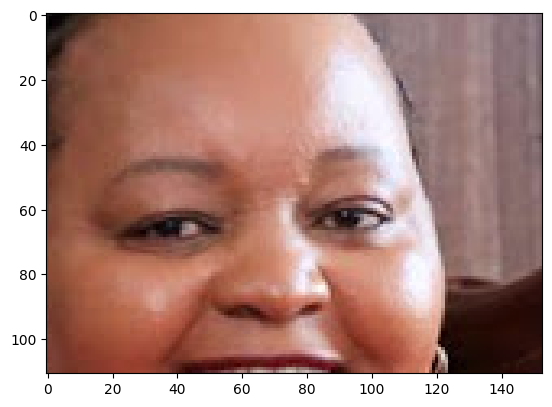

In [ ]:
import matplotlib.pyplot as plt

# Show the detected face in the image
plt.imshow(t_im[y:y+h, x:x+w])
plt.show()

In [ ]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 [==============================] - 0s 28ms/step


In [ ]:
test_im = [test_im]
ypreds = model.predict(test_im)

In [ ]:
ypreds

array([2])

In [ ]:
encoder.inverse_transform(ypreds)

array(['anne_waiguru'], dtype='<U18')